# Population data analysis 
## 6/06/2024
## M.Abdirisak.A

This project will focus on analyzing population data by considering the following steps
1) Data Preparation; this involves ensuring that there is no missing or duplicate values 
2) Descriptive Analysis; perfoming Time Series analysis see growth different countries over time, growth rates and ranking countries according their population size 
3) Data visualization; creating histograms, heatmpas or scatterplots for easy understanding and interpretation 



In [15]:
# importing neccessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv('population.csv')
df.head()# head of the dateset

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


1) Data Preparation

In [3]:
df.tail()# tail of dateset

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
261,Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0
265,Zimbabwe,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,4588529.0,4734694.0,4886347.0,...,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,16320537.0


In [4]:
df.shape# shape of dateset

(266, 64)

First task is to tranform this dataset by making year from 1960 to 2022 form a colums named years and country name form an other columns named country_name
use stack method which changes wide format dataframe into long format dataframe 

In [5]:
#selecting column names from 1 to 65
cols = df.columns[1:65]
# grouping dataframe by grouping and sum the selected columns stuck the columns and reset index
df = df.groupby(['Country Name'])[cols].sum().stack().reset_index()
# renaming column names 
df.columns=['country','year','population']
# extract the year characters 
df['year'] = df['year'].str[0:4]
# converting year datatype into year datetime format to facilitates time series analysis
df['year'] = pd.to_datetime(df['year'], format='%Y')
# printing dataframe
df.head(3)

,country,year,population
0,Afghanistan,1960-01-01,8622466.0
1,Afghanistan,1961-01-01,8790140.0
2,Afghanistan,1962-01-01,8969047.0


In [6]:
df.tail(3)# tail of the dataset

,country,year,population
16755,Zimbabwe,2020-01-01,15669666.0
16756,Zimbabwe,2021-01-01,15993524.0
16757,Zimbabwe,2022-01-01,16320537.0


In [7]:
# columns names
df.columns

Index(['country', 'year', 'population'], dtype='object')

In [8]:
df.dtypes

country               object
year          datetime64[ns]
population           float64
dtype: object

In [9]:
# more about information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     16758 non-null  object        
 1   year        16758 non-null  datetime64[ns]
 2   population  16758 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 392.9+ KB


In [10]:
# checking missing values 
df.isnull().sum()

country       0
year          0
population    0
dtype: int64

There is no missing values in the dataset

In [11]:
# checking duplicates 
df.duplicated().sum()

0

There is no duplicates

2) Descriptive analysis 

Time Series Analysis

In [12]:
# setting year column as index 
df.set_index('year', inplace=True)
# print df with year as index
df.head()

,country,population
year,,
1960-01-01,Afghanistan,8622466.0
1961-01-01,Afghanistan,8790140.0
1962-01-01,Afghanistan,8969047.0
1963-01-01,Afghanistan,9157465.0
1964-01-01,Afghanistan,9355514.0


Filtering by Time Period 

Data Visualization

Histogram

array([[<Axes: title={'center': 'population'}>]], dtype=object)

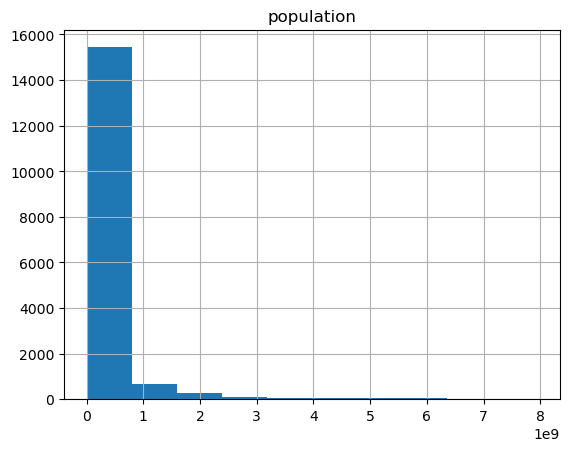

In [13]:
df.hist()

Scatterplot


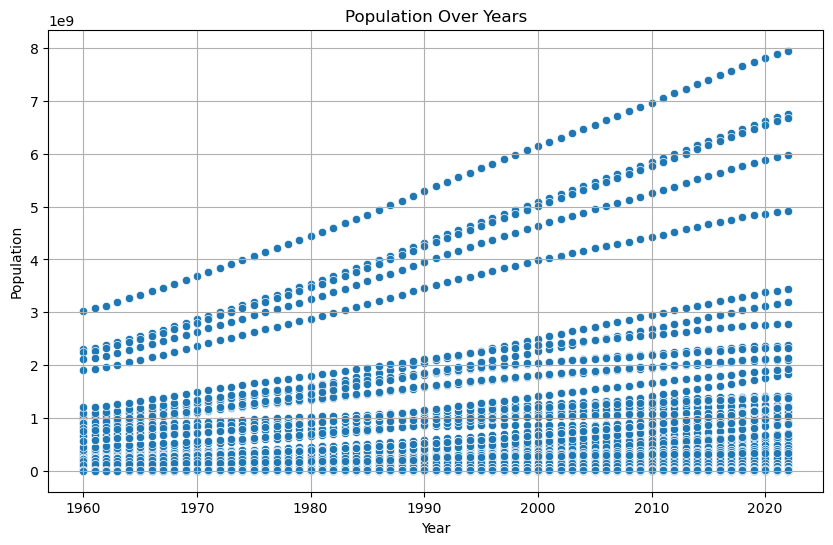

In [14]:
# Reset index for seaborn
df_reset = df.reset_index()

# Plot scatter plot of population over years
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_reset, x='year', y='population')
plt.title('Population Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


Decompose the time series 

Decompose the time series to analyze its components: trend, seasonality, and residuals.

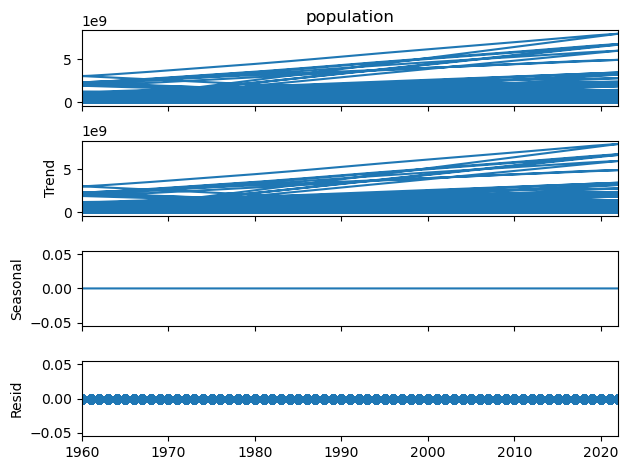

In [16]:
# Decompose the time series
decomposition = seasonal_decompose(df['population'], model='additive', period=1)
decomposition.plot()
plt.show()


Checking Stationarity using Augmented Dickey-Fuller(ADF)

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['population'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -11.943629131496188
p-value: 4.482845306257111e-22
Critial Values:
   1%, -3.4307403026802827
Critial Values:
   5%, -2.8617124982283895
Critial Values:
   10%, -2.566861816412928


According to our statistic(-11.943629131496188) and associated p-value(4.482845306257111e-22) we can conclude that there is presence stationary

AUTOCORRELATION

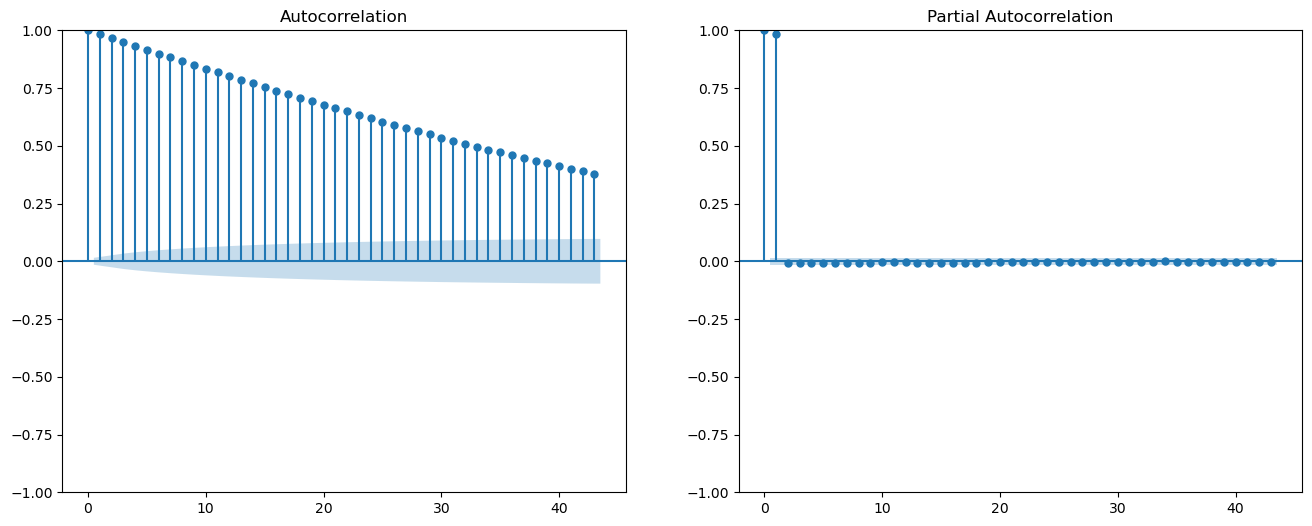

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['population'], ax=axes[0])
plot_pacf(df['population'], ax=axes[1])
plt.show()


interpretation 

Autocorrelation Function (ACF) Plot:
Pattern: The ACF plot shows a gradually decreasing autocorrelation with a slow decay.
Significance: The autocorrelations are initially very high and significant (near 1 at lag 1) and then gradually decrease.
Indication: This pattern is typical of a non-stationary time series, even though our  is stationary. This might be a sign that there is a strong autocorrelation structure in the data, such as an AR (AutoRegressive) process.

Partial Autocorrelation Function (PACF) Plot:

Pattern: The PACF plot shows a significant spike at lag 1 and then cuts off abruptly, with the rest of the lags not significant.

Significance: The significant spike at lag 1 indicates that the time series has a strong autocorrelation at this lag.

Indication: This pattern is typical of an AR(1) process, where the current value is highly correlated with the previous value, but not with values further back.